In [1]:
import numpy as n
import pandas as p
import matplotlib.pyplot as graph
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Linear Regression Model: For both single and multiple linear regressions**

In [17]:
class LinearRegression:

  def __init__(self, dataSheet, featureNumber, targetColumn, learningRate = 0.0001, featureBegin = 0, trainDataNumber = 20,  w  = [], b = 0):

    self.target = targetColumn
    data = n.array(self.normalize_data(dataSheet))
    self.fn = featureNumber
    data = data[n.random.choice(data.shape[0], trainDataNumber, replace=False), :]
    self.x = n.array(data[:, featureBegin:self.fn]).astype(float)
    self.y = n.array(data[:, self.fn]).astype(float)
    self.m = self.x.size
    self.lRate = learningRate
    self.jForGraph = []
    self.wForGraph = []
    self.bForGraph = []
    self.w = n.array(n.random.random(self.fn - featureBegin)*10) if len(w) == 0 else n.array(w)
    self.b = b

  def normalize_data(self, dataSheet):
    data = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/{dataSheet}")
    df = p.DataFrame(data)
    self.targetMin = df[self.target].min()
    self.targetMax = df[self.target].max()

    for column in df.columns:
      if data[column].corr(data[self.target]) <= 0.2:
        df.drop(column, axis = 1)

    for column in df.columns:
      df[column] = (df[column] -  df[column].min())  / (df[column].max() - df[column].min())

    return df

  def y_cap(self):
    return n.matmul(self.x, self.w) + self.b

  def cost(self):
    deviation = self.y_cap() - self.y
    deviationSquared = n.dot(deviation, deviation)
    return deviationSquared/(2*self.m)

  def gradients(self):
    deviation = self.y_cap() - self.y
    dj_dw = n.matmul(deviation, self.x)/self.m
    dj_db = deviation.sum()/self.m
    return dj_dw, dj_db

  def gradient_descent(self, epochs = 1000):
    for iterate in range(epochs):
      self.jForGraph.append(self.cost())
      self.wForGraph.append(self.w.copy())
      self.bForGraph.append(self.b)

      dj_dw, dj_db = self.gradients()
      self.w -= self.lRate*dj_dw
      self.b -= self.lRate*dj_db

      while self.cost() > self.jForGraph[-1]:
        self.w = self.wForGraph[-1].copy()
        self.b = self.bForGraph[-1]
        self.lRate /= 10
        dj_dw, dj_db = self.gradients()
        self.w -= self.lRate*dj_dw
        self.b -= self.lRate*dj_db
      else:
        self.lRate *= 10

    return self.w, self.b

  def predict(self, x):
    z = n.dot(self.w, n.array(x).astype(float)) + self.b
    return z*(self.targetMax - self.targetMin) + self.targetMin

  def plotModelAndScatterData(self):
    print(f"Linear regression model is y = ({self.w})x + {self.b}")
    graph.scatter(self.x[:50, 0], self.y[:50], c = "r")
    graph.plot(self.x[:50, 0], self.y_cap()[:50], c = "k", lw = 0.8, ls = ':')
    return

  def plotCostVsWB(self):
    graph.subplot(2, 2, 1)
    graph.plot(self.jForGraph, n.array(self.wForGraph)[:, 0])
    graph.title("Cost vs w")

    graph.subplot(2, 2, 2)
    graph.plot(self.jForGraph, self.bForGraph)
    graph.title("Cost vs b")
    return



# **Single Linear Regression**

Cost before gradient descent = 0.6552083512640468
Cost after gradient descent = 3.976662017664202e-21
Linear regression model is y = ([0.99666667])x + 0.009999999944529606


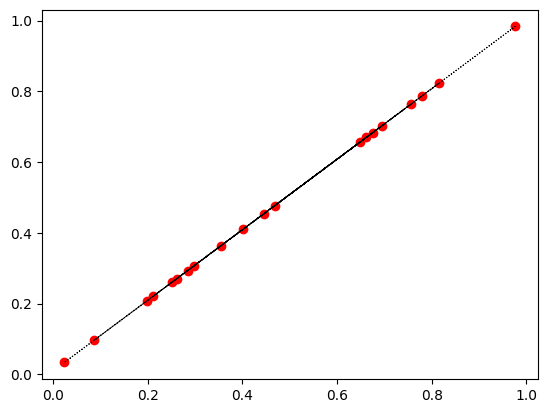

In [ ]:
lr_single = LinearRegression("dataSheet.csv", 1, "Y", 1)
print("Cost before gradient descent =", lr_single.cost())
lr_single.gradient_descent(100)
print("Cost after gradient descent =",lr_single.cost())
lr_single.plotModelAndScatterData()

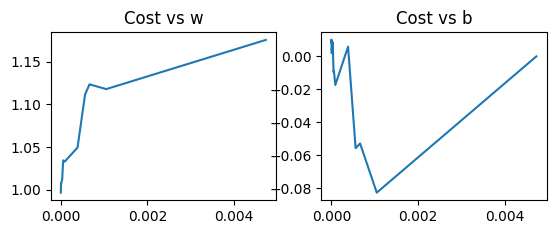

In [ ]:
lr_single.plotCostVsWB()

In [ ]:
data_lr_single = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/dataSheet.csv")
df_lr_single = p.DataFrame(data_lr_single)
m_lr_single = 100

for column in df_lr_single.columns:
  if column == "Y":
    continue
  df_lr_single[column] = (df_lr_single[column] -  df_lr_single[column].min()) / (df_lr_single[column].max() - df_lr_single[column].min())

df_lr_single = n.array(df_lr_single)
for i in range(m_lr_single):
  print("Actual =", df_lr_single[i, 1], "---- Predicted =", lr_single.predict(df_lr_single[i, 0]))

Actual = 3.888888889 ---- Predicted = [3.88888889]
Actual = 4.555555556 ---- Predicted = [4.55555555]
Actual = 5.222222222 ---- Predicted = [5.22222222]
Actual = 5.888888889 ---- Predicted = [5.88888889]
Actual = 6.555555556 ---- Predicted = [6.55555555]
Actual = 7.222222222 ---- Predicted = [7.22222222]
Actual = 7.888888889 ---- Predicted = [7.88888889]
Actual = 8.555555556 ---- Predicted = [8.55555555]
Actual = 9.222222222 ---- Predicted = [9.22222222]
Actual = 9.888888889 ---- Predicted = [9.88888889]
Actual = 10.55555556 ---- Predicted = [10.55555555]
Actual = 11.22222222 ---- Predicted = [11.22222222]
Actual = 11.88888889 ---- Predicted = [11.88888889]
Actual = 12.55555556 ---- Predicted = [12.55555555]
Actual = 13.22222222 ---- Predicted = [13.22222222]
Actual = 13.88888889 ---- Predicted = [13.88888889]
Actual = 14.55555556 ---- Predicted = [14.55555555]
Actual = 15.22222222 ---- Predicted = [15.22222222]
Actual = 15.88888889 ---- Predicted = [15.88888889]
Actual = 16.55555556 -

# **Multiple Linear Regression**

Cost before gradient descent = 65.20401889351152
Cost after gradient descent = 7.646875782172652e-06


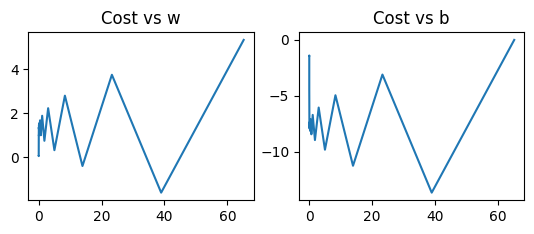

In [18]:
lr_mul = LinearRegression("linear_regression_train.csv", 26, "Target", 6, 1, 47000)
print("Cost before gradient descent =", lr_mul.cost())
lr_mul.gradient_descent(10000)
print("Cost after gradient descent =",lr_mul.cost())
lr_mul.plotCostVsWB()


Predictions for training data-set

In [19]:
data_lr = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/linear_regression_train.csv")
df_lr = p.DataFrame(data_lr)
m_lr = 100
cost_lr = 0
RSS = 0
TSS = 0

for column in df_lr.columns:
  if column == "ID" or column == "Target":
    continue
  df_lr[column] = (df_lr[column] -  df_lr[column].min())  / (df_lr[column].max() - df_lr[column].min())

df_lr = n.array(df_lr)

for i in range(47000, 47000 + m_lr):
  prediction = lr_mul.predict(df_lr[i, 1:26])
  cost_lr += (df_lr[i, 26] - prediction)**2

  RSS += (df_lr[i, 26] - prediction)**2
  TSS += (df_lr[i, 26] - n.mean(n.array(data_lr)[:, 26]))**2

  print("ID =", int(df_lr[i, 0]), "---- Actual value =", df_lr[i, 26], "---- Predicted value =", prediction)

R2 = 1 - RSS/TSS
print("\nR2 score =", R2)
print("Cost =", cost_lr/(2*m_lr))

ID = 47001 ---- Actual value = 955.659905169122 ---- Predicted value = 773.2137786459007
ID = 47002 ---- Actual value = 563.9516969890435 ---- Predicted value = 255.44857863571724
ID = 47003 ---- Actual value = 611.8233618791286 ---- Predicted value = 906.7347506008264
ID = 47004 ---- Actual value = 499.4734440065316 ---- Predicted value = 1114.0807224318633
ID = 47005 ---- Actual value = 2050.5975792616346 ---- Predicted value = 1748.6772642854412
ID = 47006 ---- Actual value = 1358.2459793904138 ---- Predicted value = 1239.3461107515286
ID = 47007 ---- Actual value = 918.986692657532 ---- Predicted value = 1205.7702005901683
ID = 47008 ---- Actual value = 2.323094116461988 ---- Predicted value = 500.88879427890606
ID = 47009 ---- Actual value = 2962.2945490232746 ---- Predicted value = 3046.473214115251
ID = 47010 ---- Actual value = -1660.4889986384196 ---- Predicted value = -1230.9437419067563
ID = 47011 ---- Actual value = 198.2739666076392 ---- Predicted value = 665.9695032152995

Predictions for test data-set

In [64]:
data_lr_t = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/linear_regression_test.csv")
df_lr_t = p.DataFrame(data_lr_t)
m_lr_t = 100

for column in df_lr_t.columns:
  if column == "ID":
    continue
  df_lr_t[column] = (df_lr_t[column] -  df_lr_t[column].min())  / (df_lr_t[column].max() - df_lr_t[column].min())
df_lr_t = n.array(df_lr_t)


for i in range(m_lr_t):
  print("ID =", int(df_lr_t[i, 0]), "--- Predicted value =", lr_mul.predict(df_lr_t[i, 1:26]))




ID = 1 --- Predicted value = 276.5342050286499
ID = 2 --- Predicted value = 3904.0585830502587
ID = 3 --- Predicted value = 3572.6112713334496
ID = 4 --- Predicted value = -2003.805787003187
ID = 5 --- Predicted value = -145.68903355481052
ID = 6 --- Predicted value = -867.894782792162
ID = 7 --- Predicted value = 2971.995448002359
ID = 8 --- Predicted value = 4681.913598040188
ID = 9 --- Predicted value = -60.38802704971749
ID = 10 --- Predicted value = -1352.2733465161473
ID = 11 --- Predicted value = 3963.2422252912165
ID = 12 --- Predicted value = 1011.1912711011591
ID = 13 --- Predicted value = 2647.8329428775614
ID = 14 --- Predicted value = 2795.655187766666
ID = 15 --- Predicted value = -3925.2202280547694
ID = 16 --- Predicted value = 599.5228443483429
ID = 17 --- Predicted value = 2964.091894582056
ID = 18 --- Predicted value = -1938.1181375712667
ID = 19 --- Predicted value = -4867.486672591533
ID = 20 --- Predicted value = -912.946202608061
ID = 21 --- Predicted value = 353

In [78]:
data_test = list(df_lr_t)
data_with_target_test = []
for i in data_test:
  prediction = lr_mul.predict(i[1:26])
  features = list(i)
  features.append(prediction)
  data_with_target_test.append(features)
data_with_target_test = n.array(data_with_target_test)
cols = [f"Feature_{i}" for i in range(1, 27)]
cols.append("Target")
df_with_target_test = p.DataFrame(data_with_target_test , columns=cols)
df_with_target_test.to_csv('linear_regression_test_predictions.csv', index=True)


# **Polynomial Regression Model: For both single and multiple polynomial regression**

In [21]:
class PolynomialRegression():
  def __init__(self, data, target, degree = 6, learningRate = 0.0001):
    self.data = data
    row = len(self.data)
    col = len(self.data[0])
    self.x = []

    for i in range(row):
      rowArray = []
      for j in range(col):
        for k in range(degree):
          rowArray.append(self.data[i][j]**(k+1))
      rowArray.append(self.data[i][1]*self.data[i][4])
      self.x.append(rowArray)

    self.x = n.array(self.x)
    self.y = target
    self.m = len(data)
    self.w = n.random.random(degree*col + 1)*10
    self.b = 0
    self.jForGraph = []
    self.wForGraph = []
    self.bForGraph = []
    self.lRate = learningRate
    self.d = degree

  def model(self, x_i):
    return n.dot(self.w, n.array(x_i).astype(float)) + self.b

  def y_cap(self):
    return n.matmul(self.x, self.w) + self.b

  def cost(self):
    deviation = self.y_cap() - self.y
    deviationSquared = n.dot(deviation, deviation)
    return deviationSquared/(2*self.m)

  def gradients(self):
    deviation = self.y_cap() - self.y
    dj_dw = n.matmul(deviation, self.x)/self.m
    dj_db = deviation.sum()/self.m
    return dj_dw, dj_db

  def gradient_descent(self, epochs = 1000):
    for iterate in range(epochs):

      self.jForGraph.append(self.cost())
      self.wForGraph.append(self.w.copy())
      self.bForGraph.append(self.b)

      dj_dw, dj_db = self.gradients()
      self.w -= self.lRate*dj_dw
      self.b -= self.lRate*dj_db


      while self.cost() > self.jForGraph[-1]:
        self.w = self.wForGraph[-1].copy()
        self.b = self.bForGraph[-1]
        self.lRate /= 10
        dj_dw, dj_db = self.gradients()
        self.w -= self.lRate*dj_dw
        self.b -= self.lRate*dj_db
      else:
        self.lRate *= 10

    return self.w, self.b

  def predict(self, x):
    featureCount = x.shape[0]
    xForPrediction = []
    for i in range(featureCount):
      for j in range(self.d):
        xForPrediction.append(x[i]**(j+1))
    xForPrediction.append(x[1]*x[4])

    return self.model(xForPrediction)

  def plotModelAndScatterData(self):
    graph.scatter(self.x[:, 0], self.y, c = "r")
    graph.plot(self.x[:, 0], self.y_cap(), c = "k", lw = 0.8, ls = ':')
    return

  def plotCostVsWB(self):
    graph.subplot(2, 2, 1)
    graph.plot(self.jForGraph, n.array(self.wForGraph)[:, 0])
    graph.title("Cost vs w")

    graph.subplot(2, 2, 2)
    graph.plot(self.jForGraph, self.bForGraph)
    graph.title("Cost vs b")
    return


Cost before gradient descent = 13415.418181726624
Cost after gradient descent = 4.1088068921083607e-17


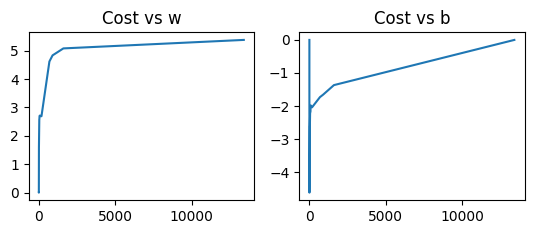

In [24]:
data_pr = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/polynomial_regression_train.csv")
backupData_pr = data_pr
df_pr = p.DataFrame(data_pr)

df_pr = n.array(df_pr)

lastColumnIndex = df_pr.shape[1]-1

x_pr = df_pr[:47000, 1:lastColumnIndex]
y_pr = df_pr[:47000, lastColumnIndex]



pr = PolynomialRegression(x_pr, y_pr, 4, 0.01)
print("Cost before gradient descent =",pr.cost())
pr.gradient_descent(50000)
print("Cost after gradient descent =",pr.cost())
pr.plotCostVsWB()


In [5]:
p.DataFrame(data_pr).corr()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
ID,1.000000,0.000986,-0.004758,-0.001422,-0.003561,0.002320,-0.003484
Feature_1,0.000986,1.000000,0.000054,0.002807,0.003584,-0.000683,0.115589
Feature_2,-0.004758,0.000054,1.000000,-0.003008,0.003794,0.003933,0.009536
Feature_3,-0.001422,0.002807,-0.003008,1.000000,0.000987,-0.010281,0.136876
Feature_4,-0.003561,0.003584,0.003794,0.000987,1.000000,-0.003775,0.071769
Feature_5,0.002320,-0.000683,0.003933,-0.010281,-0.003775,1.000000,0.015557
Target,-0.003484,0.115589,0.009536,0.136876,0.071769,0.015557,1.000000


Predictions for training data-set

In [25]:
m_pr = 1000
cost_pr_t = 0

RSS_pr = 0
TSS_pr = 0

for i in range(47000, 47000+m_pr):
  z = pr.predict(df_pr[i, 1:lastColumnIndex])
  cost_pr_t += (df_pr[i, lastColumnIndex] - z)**2
  RSS_pr += (df_pr[i, lastColumnIndex] - z)**2
  TSS_pr += (df_pr[i, lastColumnIndex] - n.mean(df_pr[:, lastColumnIndex]))**2
  print("ID", int(df_pr[i, 0]),"---- Actual value =", df_pr[i, lastColumnIndex], "---- Predicted value =", z)

r2_pr = 1 - RSS_pr/TSS_pr
print("\nR2 score =", r2_pr)
print("Cost = ", cost_pr_t/(2*m_pr))


ID 47001 ---- Actual value = -1.6127874569412863e-08 ---- Predicted value = 9.597335318140862e-09
ID 47002 ---- Actual value = -1.0394380671670804e-11 ---- Predicted value = -1.1352385755715837e-09
ID 47003 ---- Actual value = 4.652942984803384e-09 ---- Predicted value = 2.6980713973723417e-09
ID 47004 ---- Actual value = -1.0821682975132849e-08 ---- Predicted value = -2.7801839140793004e-09
ID 47005 ---- Actual value = 7.701566356110345e-09 ---- Predicted value = -1.3281188467193614e-10
ID 47006 ---- Actual value = -2.8942142600974005e-10 ---- Predicted value = 6.859075814403722e-10
ID 47007 ---- Actual value = 1.0182701451531723e-09 ---- Predicted value = 2.04308874430995e-09
ID 47008 ---- Actual value = 1.5705081167630995e-11 ---- Predicted value = -9.290356881595298e-10
ID 47009 ---- Actual value = -9.32747851454706e-10 ---- Predicted value = -7.229629682242032e-10
ID 47010 ---- Actual value = 1.7563272645707243e-09 ---- Predicted value = 7.118168224456583e-09
ID 47011 ---- Actual 

Predictions for test data-set

In [79]:
data_pr_t = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/polynomial_regression_test.csv")
backupData_pr_t = data_pr_t
df_pr_t = n.array(p.DataFrame(data_pr_t))
m_pr_t = 100

for i in range(m_pr_t):
  print("ID =", int(df_pr_t[i, 0]), "---- Predicted value =", pr.predict(df_pr_t[i, 1:lastColumnIndex]))

ID = 1 ---- Predicted value = 5.301478696118202e-09
ID = 2 ---- Predicted value = -2.9058950205661363e-09
ID = 3 ---- Predicted value = -4.774427584728237e-09
ID = 4 ---- Predicted value = 2.0162482755120833e-09
ID = 5 ---- Predicted value = -2.9665491097071783e-09
ID = 6 ---- Predicted value = 2.0731812685532596e-09
ID = 7 ---- Predicted value = -3.5275743375166644e-09
ID = 8 ---- Predicted value = 1.7462130173917046e-08
ID = 9 ---- Predicted value = 7.3900726944396195e-09
ID = 10 ---- Predicted value = -4.687051440893564e-09
ID = 11 ---- Predicted value = -1.2054944515808186e-09
ID = 12 ---- Predicted value = -1.0200903963323443e-09
ID = 13 ---- Predicted value = -7.3726946570249475e-09
ID = 14 ---- Predicted value = 8.412479961564625e-09
ID = 15 ---- Predicted value = 7.521502292087537e-09
ID = 16 ---- Predicted value = -3.019301148459581e-09
ID = 17 ---- Predicted value = -2.7822171961920396e-09
ID = 18 ---- Predicted value = 8.56785248386133e-09
ID = 19 ---- Predicted value = 1.37

In [89]:
data_test = list(df_pr_t)
data_with_target_test = []
lastColumnIndex = len(data_test[0])

for i in data_test:
  features = list(i)
  features.append( pr.predict(i[1:lastColumnIndex]))
  data_with_target_test.append(features)

data_with_target_test = n.array(data_with_target_test)
cols = [f"Feature_{i}" for i in range(1, lastColumnIndex+1)]
cols.append("Target")
df_with_target_test = p.DataFrame(data_with_target_test , columns=cols)
df_with_target_test.to_csv('polynomial_regression_test_predictions.csv', index=True)

# **Logistic Regression: For both single and multi variable**

In [2]:
class LogisticRegression():
  def __init__(self, features, target, learningRate = 0.0001, threshold = 0.5):
    self.x = n.array(features)
    self.y = n.array(target)
    self.w = n.zeros(self.x.shape[1])
    self.b = 0
    self.m = features.shape[0]
    self.lRate = learningRate
    self.jForGraph = []
    self.wForGraph = []
    self.bForGraph = []
    self.threshold = threshold


  def model(self, x_i):
    return n.dot(self.w, x_i) + self.b

  def sigmoid(self, z):
    return 1/(1 + n.exp(-z))

  def y_cap(self):
    return self.sigmoid(n.matmul(self.x, self.w) + self.b)

  def cost(self):
    cost = 0
    y_predicted = self.y_cap()

    for i in range(self.m):
      cost -= (self.y[i]*n.log(y_predicted[i]) + (1-self.y[i])*n.log(1-y_predicted[i]))
    cost /= self.m

    return cost

  def gradients(self):
    deviation = self.y_cap() - self.y
    dj_dw = n.dot(deviation, self.x)/self.m
    dj_db = deviation.sum()/self.m

    return dj_dw, dj_db

  def gradient_descent(self, epochs = 1000):
    for iterate in range(epochs):
      self.jForGraph.append(self.cost())
      self.wForGraph.append(self.w)
      self.bForGraph.append(self.b)

      dj_dw, dj_db = self.gradients()
      self.w -= self.lRate*dj_dw
      self.b -= self.lRate*dj_db

    return self.w, self.b

  def plotModelAndScatterData(self):
    graph.scatter(self.x, self.y, c = "r")
    graph.plot(self.x, self.y_cap(), c = "k", lw = 0.8, ls = ':')
    return

  def plotCostVsWB(self):
    graph.subplot(2, 2, 1)
    graph.plot(self.jForGraph)
    graph.title("Cost reduction")

    graph.subplot(2, 2, 2)
    graph.plot(self.jForGraph, self.bForGraph)
    graph.title("Cost vs b")
    return


  def predict(self, x):
    y_prediction = self.sigmoid(self.model(x))
    if(y_prediction >= 0.5):
      return 1, y_prediction
    else:
      return 0, y_prediction




Cost before optimization = 0.6931471805592001
Cost after optimization = 0.2838835605008478


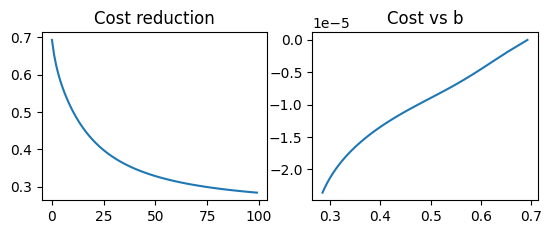

In [92]:
data_loR = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/binary_classification_train.csv")
df_loR = p.DataFrame(data_loR)
dataForTesting_loR = n.array(df_loR)

df_loR = n.array(df_loR)
lastColumnIndex = df_loR.shape[1]-1

x_loR = df_loR[:47000, 1:lastColumnIndex]
y_loR = df_loR[:47000, lastColumnIndex]

loR = LogisticRegression(x_loR, y_loR, 0.00001, 0.5)
print("Cost before optimization =",loR.cost())
loR.gradient_descent(100)
print("Cost after optimization =",loR.cost())
loR.plotCostVsWB()



Predictions for training data-set

In [93]:
cost_loR = 0
m_loR = 1000
accuracy_loR = 0
tp = tn = fp = fn = 0

for i in range(47000, 47000 + m_loR):
  category, y_cap = loR.predict(dataForTesting_loR[i, 1:lastColumnIndex])
  cost_loR += (dataForTesting_loR[i, lastColumnIndex] - category)**2

  if dataForTesting_loR[i, lastColumnIndex] == category:
    accuracy_loR += 1

  if dataForTesting_loR[i, lastColumnIndex] == 1 and category == 1:
    tp+=1
  elif dataForTesting_loR[i, lastColumnIndex] == 0 and category == 0:
    tn+=1
  elif dataForTesting_loR[i, lastColumnIndex] == 0 and category == 1:
    fp+=1
  elif dataForTesting_loR[i, lastColumnIndex] == 1 and category == 0:
    fn+=1

  print("ID =", int(dataForTesting_loR[i, 0]), "---- Actual value =", dataForTesting_loR[i, lastColumnIndex],"---- Predicted value =",category)

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2*precision*recall/(precision + recall)
accuracy_loR /= m_loR

print("\nAccuracy =", accuracy_loR)
print("F1 score =", f1)
print("Cost =", cost_loR/(m_loR))

ID = 47001 ---- Actual value = 0.0 ---- Predicted value = 0
ID = 47002 ---- Actual value = 0.0 ---- Predicted value = 0
ID = 47003 ---- Actual value = 1.0 ---- Predicted value = 1
ID = 47004 ---- Actual value = 0.0 ---- Predicted value = 0
ID = 47005 ---- Actual value = 0.0 ---- Predicted value = 0
ID = 47006 ---- Actual value = 1.0 ---- Predicted value = 1
ID = 47007 ---- Actual value = 1.0 ---- Predicted value = 1
ID = 47008 ---- Actual value = 0.0 ---- Predicted value = 0
ID = 47009 ---- Actual value = 0.0 ---- Predicted value = 0
ID = 47010 ---- Actual value = 0.0 ---- Predicted value = 0
ID = 47011 ---- Actual value = 0.0 ---- Predicted value = 0
ID = 47012 ---- Actual value = 1.0 ---- Predicted value = 1
ID = 47013 ---- Actual value = 0.0 ---- Predicted value = 0
ID = 47014 ---- Actual value = 1.0 ---- Predicted value = 1
ID = 47015 ---- Actual value = 0.0 ---- Predicted value = 0
ID = 47016 ---- Actual value = 1.0 ---- Predicted value = 1
ID = 47017 ---- Actual value = 1.0 ---- 

Predictions for test data-set

In [94]:
data_loR_t = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/binary_classification_test.csv")
df_loR_t = n.array(p.DataFrame(data_loR_t))
m_loR_t = 100

for i in range(m_loR_t):
  category, y_cap = loR.predict(df_loR_t[i, 1:lastColumnIndex])
  print("ID =", int(dataForTesting_loR[i, 0]), "---- Predicted value =",category)



ID = 1 ---- Predicted value = 0
ID = 2 ---- Predicted value = 0
ID = 3 ---- Predicted value = 0
ID = 4 ---- Predicted value = 0
ID = 5 ---- Predicted value = 0
ID = 6 ---- Predicted value = 0
ID = 7 ---- Predicted value = 1
ID = 8 ---- Predicted value = 0
ID = 9 ---- Predicted value = 0
ID = 10 ---- Predicted value = 0
ID = 11 ---- Predicted value = 0
ID = 12 ---- Predicted value = 1
ID = 13 ---- Predicted value = 0
ID = 14 ---- Predicted value = 1
ID = 15 ---- Predicted value = 0
ID = 16 ---- Predicted value = 0
ID = 17 ---- Predicted value = 1
ID = 18 ---- Predicted value = 0
ID = 19 ---- Predicted value = 0
ID = 20 ---- Predicted value = 0
ID = 21 ---- Predicted value = 1
ID = 22 ---- Predicted value = 1
ID = 23 ---- Predicted value = 1
ID = 24 ---- Predicted value = 0
ID = 25 ---- Predicted value = 0
ID = 26 ---- Predicted value = 1
ID = 27 ---- Predicted value = 0
ID = 28 ---- Predicted value = 1
ID = 29 ---- Predicted value = 0
ID = 30 ---- Predicted value = 0
ID = 31 ---- Predic

In [97]:
data_test = list(df_loR_t)
data_with_target_test = []
lastColumnIndex = len(data_test[0])

for i in data_test:
  features = list(i)
  features.append( loR.predict(i[1:lastColumnIndex])[0])
  data_with_target_test.append(features)

data_with_target_test = n.array(data_with_target_test)
cols = [f"Feature_{i}" for i in range(1, lastColumnIndex+1)]
cols.append("Target")
df_with_target_test = p.DataFrame(data_with_target_test , columns=cols)
df_with_target_test.to_csv('logistic_regression_test_predictions.csv', index=True)

# **K-Nearest Neighbours: For both single and multi variable**

In [98]:
class KNN():
  def __init__(self, dataFrame, featureBegin, featureEnd, trainDataNumber, nearestNeighbours):
    self.df = dataFrame
    data = n.array(self.df)
    data = data[n.random.choice(data.shape[0], trainDataNumber, replace=False), :]
    self.x = data[:, featureBegin:featureEnd]
    self.y = data[:, featureEnd]
    self.k = nearestNeighbours

  def correlations(self):
    print(self.df["Class"].unique())
    for column in self.df.columns:
      print(column , self.df[column].corr(self.df["Class"]))

  def visualize(self, n):
      graph.scatter(self.df["Feature_13"][:n], self.df["Feature_15"][:n], c = self.df["Class"][:n])

  def shortestDistances(self, dataPoint):
    distances = []
    for i in range(self.x.shape[0]):
      difference = dataPoint - self.x[i]
      distance = n.dot(difference, difference)**0.5
      distances.append(distance)

    distances = n.array(distances)
    return self.y[n.argsort(distances)][:self.k]

  def predict(self, dataPoint):
    d = self.shortestDistances(dataPoint)
    return n.bincount(d.astype(int)).argmax()





Predictions for training data-set

In [99]:
data_knn = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/multi_classification_train.csv")
df_knn = p.DataFrame(data_knn)
dataForTesting_knn = n.array(df_knn)
accuracy_knn = 0

knn = KNN(df_knn, 1, 21, df_knn.shape[0], 9)
cost_knn = 0
m_knn = 100
y_pred = []
y_true = dataForTesting_knn[:m_knn, 21]
precision_knn = recall_knn = f1_knn = n.zeros(n.unique(dataForTesting_knn[:, 21]).shape[0])

for i in range(m_knn):
  predictedClass = knn.predict(dataForTesting_knn[i, 1:21])
  cost_knn += (dataForTesting_knn[i, 21] - predictedClass)**2

  if dataForTesting_knn[i, 21] == predictedClass:
    accuracy_knn += 1

  y_pred.append(predictedClass)
  print("ID =",int(dataForTesting_knn[i, 0]) ,"---- Actual =",dataForTesting_knn[i, 21], "---- Predicted =", predictedClass)

y_pred = n.array(y_pred)
for i in n.unique(y_true.astype(int)):
  tp = n.sum((y_true == i) & (y_pred == i))
  fp = n.sum((y_true != i) & (y_pred == i))
  fn = n.sum((y_true == i) & (y_pred != i))

  if tp + fp > 0:
    precision_knn[i] = tp / (tp + fp)
  if tp + fn > 0:
    recall_knn[i] = tp / (tp + fn)
  if precision_knn[i] + recall_knn[i] > 0:
    f1_knn[i] = 2 * (precision_knn[i] * recall_knn[i]) / (precision_knn[i] + recall_knn[i])

accuracy_knn /= m_knn
print("\nAccuracy =", accuracy_knn)
print("F1 score =", n.mean(f1_knn))
print("Cost =", cost_knn/(2*m_knn))

ID = 1 ---- Actual = 1.0 ---- Predicted = 1
ID = 2 ---- Actual = 2.0 ---- Predicted = 2
ID = 3 ---- Actual = 4.0 ---- Predicted = 4
ID = 4 ---- Actual = 2.0 ---- Predicted = 2
ID = 5 ---- Actual = 2.0 ---- Predicted = 2
ID = 6 ---- Actual = 1.0 ---- Predicted = 1
ID = 7 ---- Actual = 2.0 ---- Predicted = 2
ID = 8 ---- Actual = 3.0 ---- Predicted = 3
ID = 9 ---- Actual = 1.0 ---- Predicted = 1
ID = 10 ---- Actual = 4.0 ---- Predicted = 0
ID = 11 ---- Actual = 2.0 ---- Predicted = 2
ID = 12 ---- Actual = 2.0 ---- Predicted = 2
ID = 13 ---- Actual = 2.0 ---- Predicted = 2
ID = 14 ---- Actual = 3.0 ---- Predicted = 3
ID = 15 ---- Actual = 4.0 ---- Predicted = 4
ID = 16 ---- Actual = 1.0 ---- Predicted = 1
ID = 17 ---- Actual = 1.0 ---- Predicted = 1
ID = 18 ---- Actual = 3.0 ---- Predicted = 3
ID = 19 ---- Actual = 3.0 ---- Predicted = 3
ID = 20 ---- Actual = 0.0 ---- Predicted = 0
ID = 21 ---- Actual = 2.0 ---- Predicted = 2
ID = 22 ---- Actual = 0.0 ---- Predicted = 0
ID = 23 ---- Actual

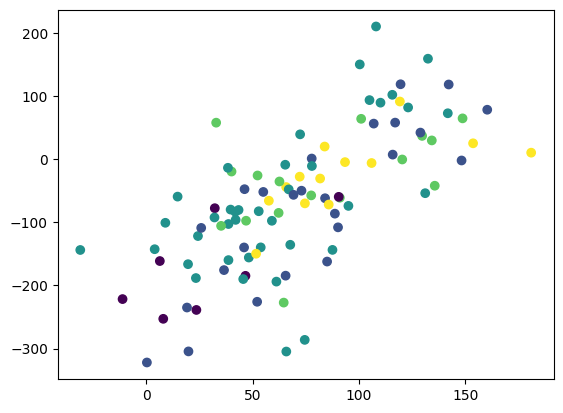

In [38]:
knn.visualize(100)

Predictions for test data-set

In [100]:
data_knn_t = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/multi_classification_test.csv")
df_knn_t = n.array(p.DataFrame(data_knn_t))
m_knn_t = 100

for i in range(m_knn):
  predictedClass = knn.predict(df_knn_t[i, 1:21])
  print("ID =",int(df_knn_t[i, 0]), "---- Predicted class =", predictedClass)


ID = 1 ---- Predicted class = 3
ID = 2 ---- Predicted class = 1
ID = 3 ---- Predicted class = 1
ID = 4 ---- Predicted class = 1
ID = 5 ---- Predicted class = 2
ID = 6 ---- Predicted class = 1
ID = 7 ---- Predicted class = 2
ID = 8 ---- Predicted class = 3
ID = 9 ---- Predicted class = 2
ID = 10 ---- Predicted class = 3
ID = 11 ---- Predicted class = 3
ID = 12 ---- Predicted class = 2
ID = 13 ---- Predicted class = 2
ID = 14 ---- Predicted class = 2
ID = 15 ---- Predicted class = 1
ID = 16 ---- Predicted class = 2
ID = 17 ---- Predicted class = 3
ID = 18 ---- Predicted class = 4
ID = 19 ---- Predicted class = 3
ID = 20 ---- Predicted class = 2
ID = 21 ---- Predicted class = 1
ID = 22 ---- Predicted class = 1
ID = 23 ---- Predicted class = 2
ID = 24 ---- Predicted class = 1
ID = 25 ---- Predicted class = 3
ID = 26 ---- Predicted class = 0
ID = 27 ---- Predicted class = 1
ID = 28 ---- Predicted class = 2
ID = 29 ---- Predicted class = 4
ID = 30 ---- Predicted class = 3
ID = 31 ---- Predic

In [101]:
data_test = list(df_knn_t)
data_with_target_test = []
lastColumnIndex = len(data_test[0])

for i in data_test:
  features = list(i)
  features.append(knn.predict(i[1:lastColumnIndex]))
  data_with_target_test.append(features)

data_with_target_test = n.array(data_with_target_test)
cols = [f"Feature_{i}" for i in range(1, lastColumnIndex+1)]
cols.append("Target")
df_with_target_test = p.DataFrame(data_with_target_test , columns=cols)
df_with_target_test.to_csv('knn_test_predictions.csv', index=True)

# K-**Means**

In [39]:
class kMeans():
  def __init__(self, data, k, dataFrame):
    self.data = data
    self.k = k
    self.df = dataFrame
    self.m = data.shape[0]
    self.centroids = {}
    self.clusters = {}

    for i in range(1, k+1):
      self.centroids[i] = n.random.random(data.shape[1])
      self.clusters[i] = []

  def findCluster(self):
    data = self.data
    centroids = self.centroids

    for i in range(1, self.k+1): self.clusters[i] = []

    for d in data:
      closestCluster = 0
      closestDistance = n.inf
      for key in centroids:
        distance = d - centroids[key]
        distance = n.dot(distance, distance)**0.5
        if distance <= closestDistance:
          closestCluster = key
          closestDistance = distance

      self.clusters[closestCluster].append(d)

    return self.clusters

  def optimize(self, iterations):
    for i in range(iterations):
      self.findCluster()
      clusters = self.clusters
      for key in clusters:
        self.centroids[key] = n.mean(clusters[key], axis = 0)
    return self.centroids

  def cost(self):
    clusters = self.clusters
    centroids = self.centroids

    cost = 0
    for key in clusters:
      for i in clusters[key]:
        distance = i - centroids[key]
        cost += n.dot(distance, distance)
    cost = cost/self.m
    return cost

  def plotClusters(self, feature_1, feature_2):
    clusters = self.clusters
    colours = ["red", "blue", "green", "yellow", "cyan"]
    i, j = 1, 5
    for key in clusters:
      for d in clusters[key][:500]:
        graph.scatter(d[i], d[j], c = colours[key-1])
      graph.scatter(self.centroids[key][i], self.centroids[key][j], facecolor = "black", marker = "x", s = 100, linewidth=3)


In [40]:
data_kmeans = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/unsupervised_data.csv")
df_kmeans = n.array(p.DataFrame(data_kmeans))

x = []
y = []

for i in range(1, 11):
  km = kMeans(df_kmeans[:20, 1:7], i, data_kmeans)
  km.findCluster()
  km.optimize(100)
  x.append(i)
  y.append(km.cost())

print(x, y)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [12771.326593468091, 8834.5128661518, 8543.127927173475, 1944.2558314719997, 5300.569494771552, 3048.5242856999294, 2888.3952545200436, 840.9503834880722, 428.4812432943586, 393.53824631852666]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


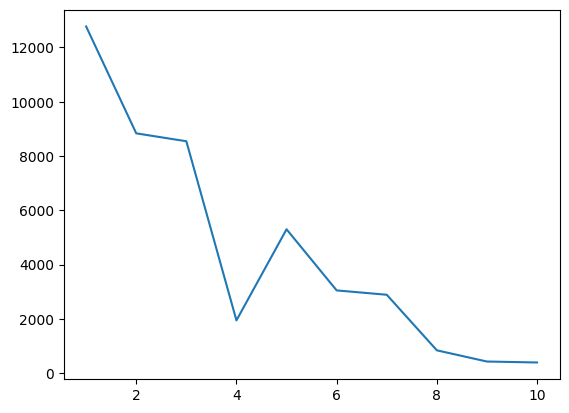

In [41]:
graph.plot(x, y)
print(x)

In [42]:
km = kMeans(df_kmeans[:, 1:7], 5, data_kmeans)
km.findCluster()
print("Initial cost =",km.cost())
km.optimize(100)
print("Final cost =",km.cost())

Initial cost = 12528.172466950007
Final cost = 2027.5814635842771


In [ ]:
print(km.df.corr())

                 ID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
ID         1.000000   0.007201  -0.023498   0.003952  -0.010152  -0.002170   
Feature_1  0.007201   1.000000  -0.499221  -0.673804  -0.287963   0.531589   
Feature_2 -0.023498  -0.499221   1.000000   0.296943   0.259739  -0.307379   
Feature_3  0.003952  -0.673804   0.296943   1.000000  -0.208931  -0.806644   
Feature_4 -0.010152  -0.287963   0.259739  -0.208931   1.000000   0.416051   
Feature_5 -0.002170   0.531589  -0.307379  -0.806644   0.416051   1.000000   
Feature_6  0.006437  -0.207020  -0.268057  -0.108790   0.405059  -0.001693   

           Feature_6  
ID          0.006437  
Feature_1  -0.207020  
Feature_2  -0.268057  
Feature_3  -0.108790  
Feature_4   0.405059  
Feature_5  -0.001693  
Feature_6   1.000000  


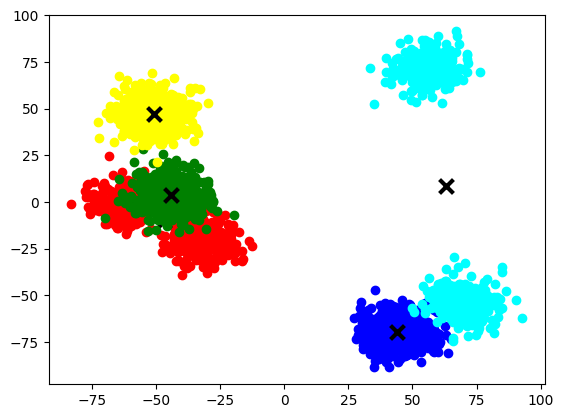

In [43]:
km.plotClusters(1, 5)

In [44]:
class decisionTree:
  def __init__(self, data):
    self.data = n.array(data)
    self.columnsAndThresholds ={}
    self.Tree = {}
    self.leaf = []

  def giniImpurity(self, data):
    uniqueVals, counts = n.unique(data[:, -1], return_counts = True)
    probabilities = counts/n.sum(counts)
    sumOfProbabilitySquares = n.dot(probabilities, probabilities)
    return 1 - sumOfProbabilitySquares

  def isColumnNumeric(self, column):
    data = self.data
    try:
      float(data[:, column][0])
      return 1
    except ValueError:
      return 0

  def findLeafCluster(self, root, data):
    for r, leaf in self.leaf:
      if r == root:
        if self.isColumnNumeric(root):
          threshold = self.columnsAndThresholds[root]
          valInLeaf = leaf[0, root]

          if (valInLeaf <= threshold and float(data[root]) <= threshold) or (valInLeaf > threshold and float(data[root]) > threshold):
            unique, counts = n.unique(leaf[:, -1], return_counts=True)
            return list(unique), list(counts/n.sum(counts))
        else:
          if data[root] == leaf[0, root]:
            unique, counts = n.unique(leaf[:, -1], return_counts=True)
            return list(unique), list(counts/n.sum(counts))

  def predict(self, data, start = 'r'):
    if start == 'r':
      root = self.Tree[start][0]
    else:
      root = start

    if self.isColumnNumeric(root):
      # print(self.columnsAndThresholds, root, "++++++++++++")
      threshold = self.columnsAndThresholds[root]
      if float(data[root]) <= threshold:
        try:
          if self.Tree[root][0] != "END":
            return self.predict(data, self.Tree[root][0])
          return self.findLeafCluster(root, data)
        except KeyError:
          return self.findLeafCluster(root, data)
      else:
        try:
          if self.Tree[root][1] != "END":
            return self.predict(data, self.Tree[root][1])
          return self.findLeafCluster(root, data)
        except KeyError:
          return self.findLeafCluster(root, data)
    else:
      arr = self.Tree[root]
      for dictionary in arr:
        if dictionary == "END":
          continue

        if data[root] in dictionary.values():
          return self.predict(data, list(dictionary.keys())[0])
          break
      else:
        return self.findLeafCluster(root, data)



  def splitData(self, data, root = "r"):
    parentImpurity = self.giniImpurity(data)
    maxInfoGain = -n.inf
    dividedDataSet = []
    thresholdOfSplitColumn = n.inf
    splitColumn = 0

    # print("\n", data, parentImpurity)

    if parentImpurity == 0:
      self.leaf.append((root, data))
      try:
        self.Tree[root].append("END")
      except KeyError:
        self.Tree[root]= ["END"]
      return data
    optimalDivisions = []
    for col in range(0, data.shape[1] - 1):


      if col in self.columnsAndThresholds.keys():
        continue

      if self.isColumnNumeric(col):
        thresholds = n.unique(data[:, col].astype(float))
        threshold = 0
        maxInfoGainWithinColumn = -n.inf
        divisions = []

        for th in thresholds:
          columnValues = data[:, col].astype(float)
          lessTh = n.where(columnValues <= th)
          greaterTh = n.where(columnValues > th)

          infoGain = parentImpurity - (n.size(lessTh)*self.giniImpurity(data[lessTh]) + n.size(greaterTh)*self.giniImpurity(data[greaterTh]))/data.shape[0]
          if infoGain >= maxInfoGainWithinColumn:
            maxInfoGainWithinColumn = infoGain
            threshold = th
            divisions = [data[lessTh], data[greaterTh]]

        # print("\ncol =", col, maxInfoGainWithinColumn, "Th =", threshold)

        if maxInfoGainWithinColumn >= maxInfoGain:
          maxInfoGain = maxInfoGainWithinColumn
          thresholdOfSplitColumn = threshold
          optimalDivisions = divisions
          splitColumn = col

      else:
        classes = n.unique(data[:, col])
        columnValues = data[:, col]
        infoGain = parentImpurity
        divisions = []

        for cl in classes:
          dataOfCL = n.where(columnValues == cl)
          dataOfCL = data[dataOfCL]
          infoGain -= self.giniImpurity(dataOfCL)**2
          divisions.append(dataOfCL)

        if infoGain >= maxInfoGain:
          maxInfoGain = infoGain
          thresholdOfSplitColumn = n.inf
          optimalDivisions = divisions
          splitColumn = col

    dividedDataSet = optimalDivisions

    # print(dividedDataSet, "++++++++")
    # print("\nFinal col =", splitColumn, maxInfoGain, "Th =", thresholdOfSplitColumn)
    self.columnsAndThresholds[splitColumn] = thresholdOfSplitColumn
    try:
      if (root == "r" and self.isColumnNumeric(splitColumn)) or self.isColumnNumeric(root):
        self.Tree[root].append(splitColumn)
      else:
        self.Tree[root].append({splitColumn : data[:, root][0]})
    except KeyError:
      if (root == "r" and self.isColumnNumeric(splitColumn)) or self.isColumnNumeric(root):
        self.Tree[root] = [splitColumn]
      else:
        self.Tree[root] = [{splitColumn : data[:, root][0]}]

    for ds in dividedDataSet:
      self.splitData(ds, splitColumn)

    return




In [63]:
data_dt = p.read_csv(f"gdrive/My Drive/ML WOC/datasheets/drug200.csv")
data_dt = n.array(data_dt)
df_dt = data_dt[n.random.choice(data_dt.shape[0], 100, replace=True), :]
dt = decisionTree(df_dt)

dt.splitData(df_dt)
print("Tree Structure:\n", dt.Tree, "\n")
# for leaf in dt.leaf:
#   print("\n", leaf)
ID = 1
for i in data_dt:
  print("ID =", ID, "Actual =",i[-1],"Predicted =", dt.predict(i[:-1]))
  ID += 1


Tree Structure:
 {'r': [4], 4: [2, 'END'], 2: [{0: 'HIGH'}, {3: 'LOW'}, 'END'], 0: ['END', 'END'], 3: ['END', 'END']} 

ID = 1 Actual = drugY Predicted = (['drugY'], [1.0])
ID = 2 Actual = drugC Predicted = (['drugC'], [1.0])
ID = 3 Actual = drugC Predicted = (['drugC'], [1.0])
ID = 4 Actual = drugX Predicted = (['drugX'], [1.0])
ID = 5 Actual = drugY Predicted = (['drugY'], [1.0])
ID = 6 Actual = drugX Predicted = (['drugX'], [1.0])
ID = 7 Actual = drugY Predicted = (['drugY'], [1.0])
ID = 8 Actual = drugC Predicted = (['drugC'], [1.0])
ID = 9 Actual = drugY Predicted = (['drugY'], [1.0])
ID = 10 Actual = drugY Predicted = (['drugY'], [1.0])
ID = 11 Actual = drugC Predicted = (['drugC'], [1.0])
ID = 12 Actual = drugY Predicted = (['drugY'], [1.0])
ID = 13 Actual = drugY Predicted = (['drugY'], [1.0])
ID = 14 Actual = drugY Predicted = (['drugY'], [1.0])
ID = 15 Actual = drugX Predicted = (['drugX'], [1.0])
ID = 16 Actual = drugY Predicted = (['drugY'], [1.0])
ID = 17 Actual = drugX Pr

In [54]:
df_dt = data_dt[n.random.choice(data_dt.shape[0], 100, replace=True), :]
dt = decisionTree(df_dt)

dt.splitData(df_dt)
# for leaf in dt.leaf:
#   print("\n", leaf)

print(dt.predict(["22", 'M', 'LOW', 'HIGH', "8.151"]))

(['drugC'], [1.0])


In [55]:
df_dt = data_dt[n.random.choice(data_dt.shape[0], 100, replace=True), :]
dt = decisionTree(df_dt)

dt.splitData(df_dt)
# for leaf in dt.leaf:
#   print("\n", leaf)

print(dt.predict(["22", 'M', 'LOW', 'HIGH', "8.151"]))

(['drugC'], [1.0])
